In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from datetime import datetime, timedelta
import warnings

import yfinance as yf

In [3]:
asset_dict = {
    'CL=F': 'Crude Oil',
    'HG=F': 'Copper',
    'TIO=F': 'Iron Ore',
    'ZS=F': 'Soybean',
    'EURUSD=X': 'EUR/USD',
    'JPY=X': 'USD/JPY',
    'NLR': 'NLR',
    'SOXX': 'SOXX',
    'VFH': 'VFH',
    'VTV': 'VTV',
    'VWO':'VWO',
    '2y German': '2y German Bunds',
    '2y': '2y UST',
    '^TNX': '10y UST'
}

In [9]:
# create dataframe
df = pd.DataFrame()

# concatenate all other asset dataframes
for asset in asset_dict.keys():
    if asset == '2y':
        new_df = pd.read_csv('fixed_income_analysis/2Y_Bond.csv') 
        new_df = new_df[['Date', 'Price']] # only date and price data
        new_df = new_df.iloc[::-1] # reverse for chronological order
        new_df.set_index('Date', inplace=True) # set date as index
        new_df.rename(columns={'Price': '2y UST'}, inplace=True) # rename to Close for analysis
        new_df.index = pd.to_datetime(new_df.index)
        new_df = new_df[new_df.index >= '2019-05-01']
    elif asset == '2y German':
        new_df = pd.read_csv('fixed_income_analysis/2y_German_data.csv') 
        new_df = new_df[['Date', 'Price']] # only date and price data
        new_df = new_df.iloc[::-1] # reverse for chronological order
        new_df.set_index('Date', inplace=True) # set date as index
        new_df.rename(columns={'Price': '2y German Bunds'}, inplace=True) # rename to Close for analysis
        new_df.index = pd.to_datetime(new_df.index)
        new_df = new_df[new_df.index >= '2019-05-01']
    else:
        new_df = yf.download(asset, '2019-05-01', '2024-04-10')
        new_df = new_df[['Close']]
        new_df.index = pd.to_datetime(new_df.index) 
    new_df.rename(columns={'Close': asset_dict[asset]}, inplace=True)
    df = pd.concat([df, new_df], axis=1)

df = df.dropna()
print(df)

[*********************100%%**********************]  1 of 1 completed
C:\Users\jyin1\AppData\Local\Temp\ipykernel_42212\2217592864.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Close': asset_dict[asset]}, inplace=True)
[*********************100%%**********************]  1 of 1 completed
C:\Users\jyin1\AppData\Local\Temp\ipykernel_42212\2217592864.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Close': asset_dict[asset]}, inplace=True)
[*********************100%%**********************]  1 of 1 completed
C:\Users\jyin1\AppData\Local\Temp\ipykernel_42212\221759286

            Crude Oil  Copper    Iron Ore  Soybean   EUR/USD     USD/JPY  \
Date                                                                       
2019-05-01  63.599998  2.8030   93.650002   839.50  1.121604  111.394997   
2019-05-02  61.810001  2.7840   93.599998   830.50  1.120084  111.452003   
2019-05-03  61.939999  2.8250   93.809998   829.50  1.117356  111.495003   
2019-05-06  62.250000  2.8370   93.510002   817.50  1.118581  110.623001   
2019-05-07  61.400002  2.7940   94.750000   817.75  1.120185  110.805000   
...               ...     ...         ...      ...       ...         ...   
2024-04-03  85.430000  4.1930  100.410004  1182.25  1.076855  151.539993   
2024-04-04  86.589996  4.2465   99.889999  1180.00  1.083835  151.580994   
2024-04-05  86.910004  4.2395   99.970001  1185.00  1.083705  151.292007   
2024-04-08  86.430000  4.2770  102.680000  1181.50  1.083048  151.690002   
2024-04-09  85.230003  4.2860  104.330002  1174.50  1.086366  151.843002   

           


C:\Users\jyin1\AppData\Local\Temp\ipykernel_42212\2217592864.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Close': asset_dict[asset]}, inplace=True)


In [10]:
sns.set_theme(style="white")
corr = df.corr()
print(corr)

                 Crude Oil    Copper  Iron Ore   Soybean   EUR/USD   USD/JPY  \
Crude Oil         1.000000  0.707708  0.216455  0.786218 -0.456329  0.629275   
Copper            0.707708  1.000000  0.647456  0.856816  0.116063  0.329487   
Iron Ore          0.216455  0.647456  1.000000  0.531902  0.561160 -0.136267   
Soybean           0.786218  0.856816  0.531902  1.000000 -0.180707  0.488419   
EUR/USD          -0.456329  0.116063  0.561160 -0.180707  1.000000 -0.722301   
USD/JPY           0.629275  0.329487 -0.136267  0.488419 -0.722301  1.000000   
NLR               0.579513  0.492687  0.141716  0.406809 -0.314048  0.796018   
SOXX              0.564142  0.793970  0.402132  0.625253 -0.007971  0.586292   
VFH               0.728302  0.858165  0.423790  0.664981 -0.033554  0.418903   
VTV               0.806654  0.855143  0.360028  0.768825 -0.217406  0.657758   
VWO               0.070109  0.544005  0.707546  0.273558  0.770083 -0.481139   
2y German Bunds   0.462837  0.274042 -0.

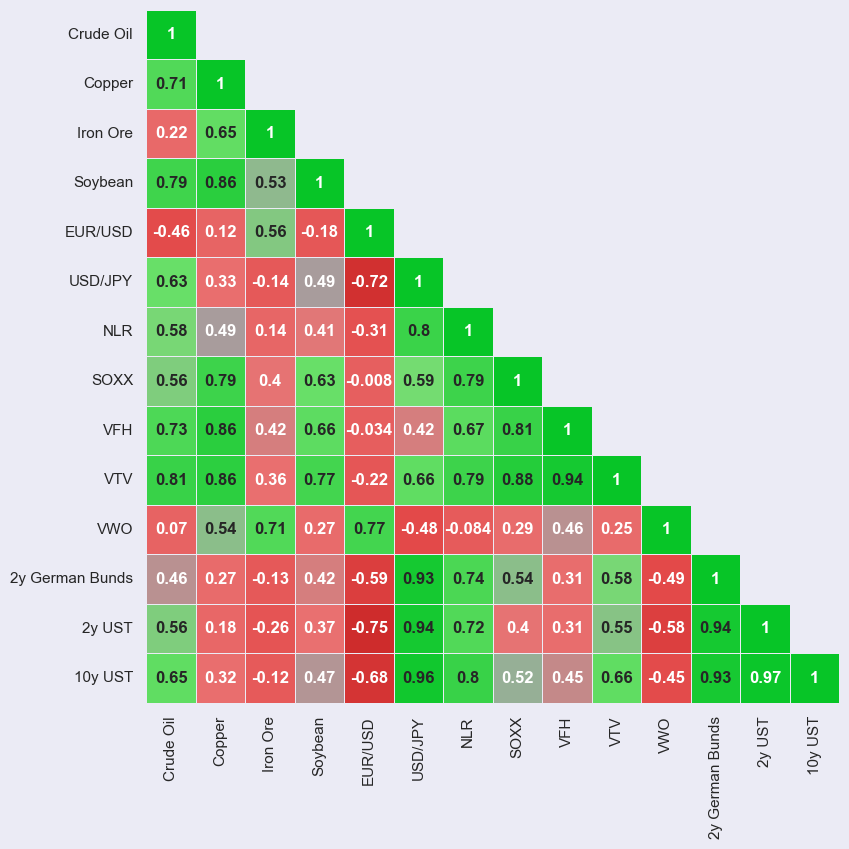

In [18]:
# heatmap visualisation
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
colors = ['#BB1111','#E34949', '#E97171','#A1A1A1' ,'#70E16D', '#07C527']
positions = [0, 0.25, 0.7 , 0.75, 0.8, 1]

# Create a colormap with the custom colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(positions, colors)))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=custom_cmap,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor = '#EBEBF5',
    cbar=False,
    annot=True,
    annot_kws={"fontweight": "bold"}
)

f.patch.set_facecolor('#EBEBF5')
ax.set_facecolor('#EBEBF5')